# Zmienna Losowa Dyskretna

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Zad. 1

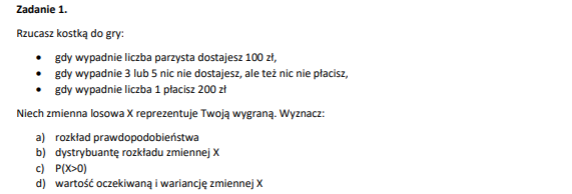

In [12]:
## A)

# 1 -> -200
# 2 -> 100
# 3 -> 0
# 4 -> 100
# 5 -> 0
# 6 -> 100

X = [-200,0,100]
prob = [1/6,1/3,1/2]

data = pd.DataFrame()
data['P(X)'] = prob
data.set_index([X], inplace=True)
data.index.name = 'X'
data.transpose()

X,-200,0,100
P(X),0.166667,0.333333,0.5


In [21]:
## B)
dystrybuanta = pd.DataFrame()
X2 = [(-np.inf, -200), '<-200,0)', '<0,100)', f'<100,{np.inf})']
dystrybuanta['F(X)'] = [0,1/6,1/2,1]
dystrybuanta.set_index([X2], inplace=True)
dystrybuanta.index.name = 'X'
dystrybuanta.transpose()

X,"(-inf, -200)","<-200,0)","<0,100)","<100,inf)"
F(X),0.0,0.166667,0.5,1.0


In [ ]:
## C)
# P(X > 0) = P(X = 100) = 1/2

In [31]:
## D)
# E(X) = -200*(1/6) + 0*(1/3) + 100 *(1/2)
E_X = -200*(1/6) + 0*(1/3) + 100 *(1/2)
print(f"Wartość oczekiwana E(X) = {E_X:.2f} zl")

# Var(X) = E(X^2) - (E(X))^2
E_X2 = (-200)**2 *(1/6) + 0**2 *(1/3) + 100**2 *(1/2)
Var_X = E_X2 - E_X**2
print(E_X2)
print(E_X**2)
print(f"Wariancja Var(X) = {Var_X:.2f} zl^2")
print(f"Odchylenie standardowe SD(X) = {np.sqrt(Var_X):.2f} zl")

Wartość oczekiwana E(X) = 16.67 zl
11666.666666666666
277.77777777777794
Wariancja Var(X) = 11388.89 zl^2
Odchylenie standardowe SD(X) = 106.72 zl


## Zad. 2

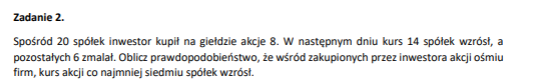

In [ ]:
# jest 20 spółek
n = 20
# kupił akcje 8
k = 8
# kurs 14 spółek wzrósł 
p = 14/20
# a kurs 6 spółek spadł
q = 6/20

# zalezy nam na P(X >= 7) = P(X = 7) + P(X = 8)
import math
# P(X = k) = (n! / (k! * (n-k)!) ) ^ p^k * q*(n-k)
P = math.comb(n,k) * (p**k) * (q**(n-k))
P2 = math.comb(n,7) * (p**7) * (q**(n-7))
print(f"P(X = {k}) = {P:.4f}")
print(f"P(X = 7) = {P2:.4f}")

P(X = 8) = 0.0039
P(X = 7) = 0.0010


In [ ]:
# Zmiana strategii zastosujemy rozkład hipergeometryczny
# Rozklad hipergeometryczny - Zmienna losowa X opisuje liczbę uzyskania k sukcesów w n losowaniach bez zwracania z populacji liczczącej N elementów, z których R to sukcesy.
# P(X = k) = (C(R,k) * C(N-R,n-k)) / C(N,n)
N = 20 # liczba spółek
R = 14 # Wzrosło 14
n = 8 # kupił akcje 8
# P(X >= 7) = P(X = 7) + P(X = 8)
P7 = (math.comb(R,7) * math.comb(N-R,n-7)) / math.comb(N,n)
P8 = (math.comb(R,8) * math.comb(N-R,n-8)) / math.comb(N,n)

P_total = P7 + P8
print(f"P(X >= 7) = {P_total*100:.2f}%")

P(X >= 7) = 18.73%


## Zad. 3

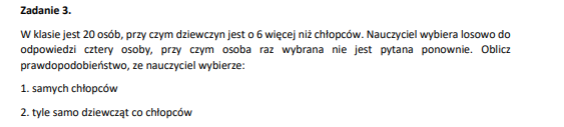

In [45]:
# 1.
# Chcemy żeby wybrał samych chłopców
# W klasie jest 20 osób
N = 20
# liczba chłopców x + x + 6 = 20 -> x = 7
R = 7
# wybiera 4 osoby
n = 4
# P(X = 4) = (C(7,4) * C(13,0)) / C(20,4)
P = (math.comb(R,4) * math.comb(N - R,n-4) ) / math.comb(N,n)
print(f"Prawdopodobieństwo że wybierze samych chłopców wynosi: {P*100:.2f}%")

Prawdopodobieństwo że wybierze samych chłopców wynosi: 0.72%


In [46]:
# 2.
# Chcemy aby wybrał tyle samo dziewczyn co chłopców
N = 20
# liczba dziewczyn 20 - 7 = 13
R = 13
# wybiera 4 osoby
n = 4
# Zależy nam na P(X = 2) = (C(13,2) * C(7,2)) / C(20,4)
P2 = (math.comb(R,2) * math.comb(N - R, n - 2)) / math.comb(N,n)
print(f"Prawdopodbieństwo że wybierze po równo wynosi: {P2*100:.2f}%")

Prawdopodbieństwo że wybierze po równo wynosi: 33.81%


## Zad. 4

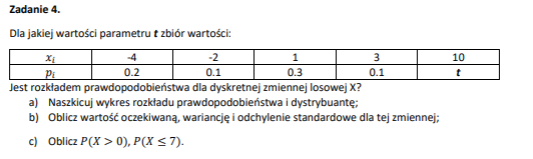

In [52]:
# Aby był to rozkład zmiennej losowej X suma prawdopodobieństw musi wynosić 1
# 0.2 + 0.1 + 0.3 + 0.1 + t = 1
# t = 0.3
xi = [-4,-2,1,3,10]
pi = [0.2,0.1,0.3,0.1,0.3]

df = pd.DataFrame()
df['P(X)'] = pi
df.set_index([xi],inplace=True)
df.index.name = "X"
df.transpose()

X,-4,-2,1,3,10
P(X),0.2,0.1,0.3,0.1,0.3


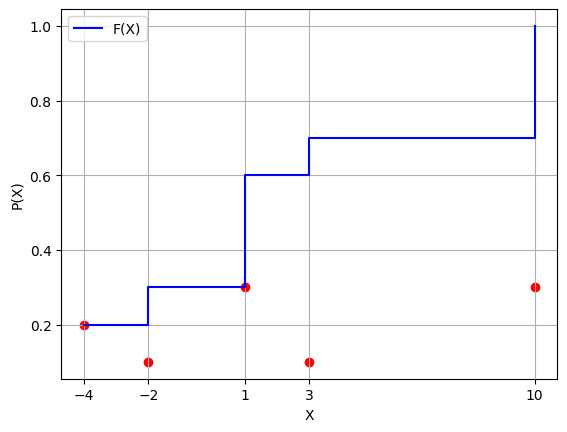

In [70]:
## a)
# Dystrybuanta F(X)
df['F(X)'] = df['P(X)'].cumsum()

figure, axes = plt.subplots(1,1)
axes.scatter(df.index,df['P(X)'],c='red')
axes.set_xlabel('X')
axes.set_ylabel('P(X)')
axes.set_xticks(df.index)

axes.step(df.index, df['F(X)'], where='post', label='F(X)', color='blue')
axes.legend()


plt.grid(True)
plt.show()

In [77]:
## B)
# E(X) = SUM(xi * P(xi))
E_X = sum(xi[i] * pi[i] for i in range(0,len(xi)))

# VAR(X) = E[X^2] - (E[X])^2
Var_X = sum((xi[i]**2) * pi[i] for i in range(0,len(xi))) - (E_X**2)

# SD(X) = sqrt(VAR(X))
SD_X = np.sqrt(Var_X)

print(f"Wartość oczekiwana: {E_X}")
print(f"Wariancja: {Var_X}")
print(f"Odchylenie standardowe: {SD_X}")

Wartość oczekiwana: 2.6
Wariancja: 28.039999999999996
Odchylenie standardowe: 5.295280917949491


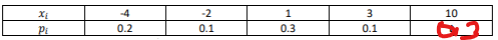

In [ ]:
## C)
# P(X > 0) = P(X = 1) + P(X=3) + P(X = 10)
# P(X > 0) = 0,3 + 0,1 + 0,3 = 0,7

# P(X <= 7) = P(X = -4) + P(X = -2) + P(X = 1) + P(X = 3)
# P(X <= 7) = 0,2 + 0,1 + 0,3 + 0,1 = 0,7

## Zad. 5

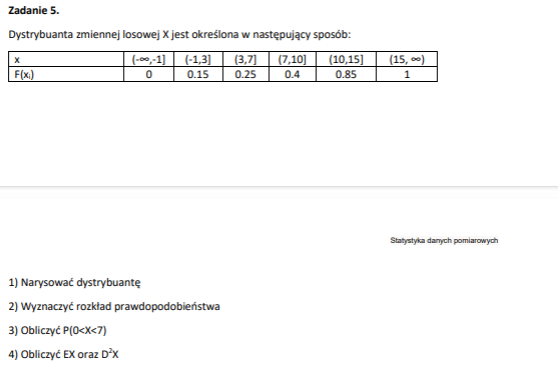

In [84]:
df = pd.DataFrame()
df['F(X)'] = [0,0.15,0.25,0.4,0.85,1]
df.index = [f"(-{np.inf},1)","<-1,3)","<3,7)","<7,10)","<10,15)",f"<15,{np.inf})"]
df.index.name = "X"

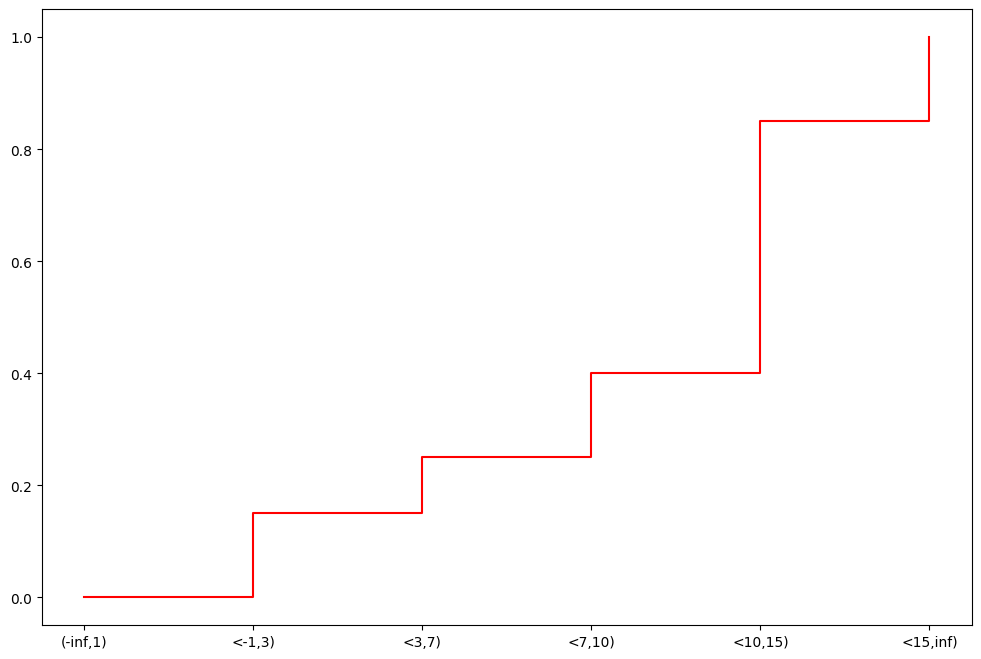

In [85]:
fig, ax = plt.subplots(figsize=(12,8))

ax.step(df.index,df['F(X)'],where='post',c='red')

plt.show()


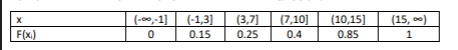

In [87]:
## 2) 
# wyznaczyc rozklad prawdopodobienstwa 
xi = [1,3,7,10,15]
pi = [0.15,0.10,0.15,0.45,0.15]
df = pd.DataFrame()
df['P(X)'] = pi
df.set_index([xi],inplace=True)
df.index.name = "X"
df.transpose()

X,1,3,7,10,15
P(X),0.15,0.1,0.15,0.45,0.15


In [ ]:
## 3)
# P(0 < X < 7) = P(X = 1) + P(X = 3)
# P(0 < X < 7) = 0.15 + 0.1 = 0.25

In [90]:
## 4)
E_X = sum(xi[i] * pi[i] for i in range(len(xi)))

D_2_X = sum((xi[i]**2) * pi[i] for i in range(len(xi))) - (E_X**2)

print(f"E(X) = {E_X}")
print(f"D^2(X) = {D_2_X}")

E(X) = 8.25
D^2(X) = 19.087500000000006


## Zad. 6

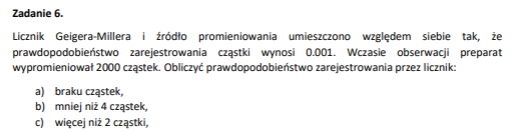

In [94]:
# Zastosujemy Schemat Bernulliego
# P(X = k) = C(n,k) * p^k * (1 - p)^(n-k)

# Poniewaz interesuje nas brak cząstek
# p - prob sukcesu = 0.001
p = 0.001
# n - liczba prob
n = 2000

P_0 = math.comb(n,0) * (p**0) * ((1-p)**n)
print(f"Wykrycie braku cząstek: {P_0*100:.2f}%")

# P(X < 4) = P(X=0) + P(X=1) + P(X=2) + P(X=3)
P_1 = math.comb(n,1) * (p**1) * ((1-p)**(n-1))
P_2 = math.comb(n,2) * (p**2) * ((1-p)**(n-2))
P_3 = math.comb(n,3) * (p**3) * ((1-p)**(n-3))
P_total1 = P_1 + P_2 + P_3
print(f"Wykrycie mniej niż 4 cząstek: {P_total1*100:.2f}%")

# Prob wykrycia wiecej niz 2 to jest 1 - P(X <= 2)
# P(X <= 2) = P(X=0) + P(X=1) + P(X=2)
P_total2 = 1 - (P_0 + P_1 + P_2)
print(f"Wykrycie więcej niż 2 cząstek: {P_total2*100:.2f}%")

Wykrycie braku cząstek: 13.52%
Wykrycie mniej niż 4 cząstek: 72.20%
Wykrycie więcej niż 2 cząstek: 32.33%
